<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Pacifico; background-color:#2a6199; overflow:hidden"><b> Student Performance Analysis and Prediction </b></div>

![student](https://img.freepik.com/free-vector/hand-drawn-people-studying-from-home-with-book_52683-66768.jpg?t=st=1720468095~exp=1720471695~hmac=31252a37fdd61d4013f4fefbbf461d9ea594932d117bafdb5dab62e1c477f458&w=1380)

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> Table of Contents </b></div>

- <a href="#libraries">1. Installing Required Libraries</a>
- <a href="#data">2. Reading and Understanding our Data</a>
- <a href="#visual">3. Data Visualization</a>
    - <a href="#cat">3.1. Distribution of Categorical Features</a>  
    - <a href="#num">3.2. Distribution of Numerical Features</a>
    - <a href="#corr">3.3. Exploring Correlation</a>
    - <a href="#outliers">3.4. Exploring Outliers</a>    
    - <a href="#target">3.5. Distribution of a Target variable</a> 
- <a href="#prepr">4. Data Preprocessing</a>
    - <a href="#sep">4.1. Separate features and target</a>
    - <a href="#scale">4.2. Data Scaling</a>
    - <a href="#split">4.3. Train / Test Split</a>      
- <a href="#ml">5. Modeling</a> 

<a id="libraries"></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>1. Installing Required Libraries</b></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

sns.set_theme(context='notebook', palette='pastel', style='whitegrid')

<a id="data"></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1;overflow:hidden"><b>2. Reading and Understanding our Data</b></div>

In [1]:
df = pd.read_csv('/kaggle/input/students-performance-dataset/Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [3]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [4]:
# Count duplicated rows in the DataFrame
sum(df.duplicated())

0

In [5]:
# Drop unnecessary column from the DataFrame
df.drop(['StudentID', 'GPA'], axis=1, inplace=True)

df.shape

(2392, 13)

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>The dataset contains a total of <strong>2,392 observations</strong>.</li>
        <li>All values in the dataset are <strong>non-null</strong> and <strong>numerical</strong>.</li>
        <li>There are <strong>no duplicate</strong> records.</li>
        <li>Our target variable is `GradeClass`, that is why `GPA` column <strong>should be dropped</strong>, as these columns give similar information.</li>
        <li>After removing the `StudentID` and `GPA` columns, the dataset consists of <strong>13 columns</strong>.</li>
    </ul>
</div>

<a id="visual"></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3. Data Visualization</b></div>

In [6]:
# Identify numerical columns: columns with more than 5 unique values are considered numerical
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]

# Identify categorical columns: columns that are not numerical and not 'GradeClass'
categorical_columns = df.columns.difference(numerical_columns).difference(['GradeClass']).to_list()

<a id='cat'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.1. Distribution of Categorical Features  </b></div>

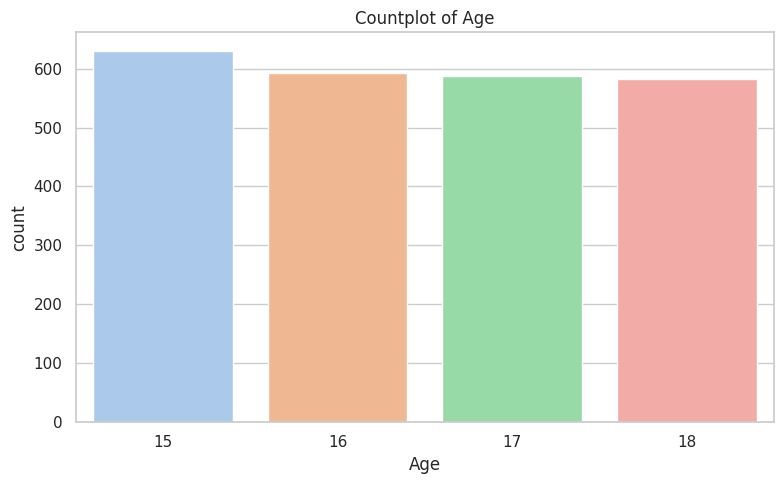

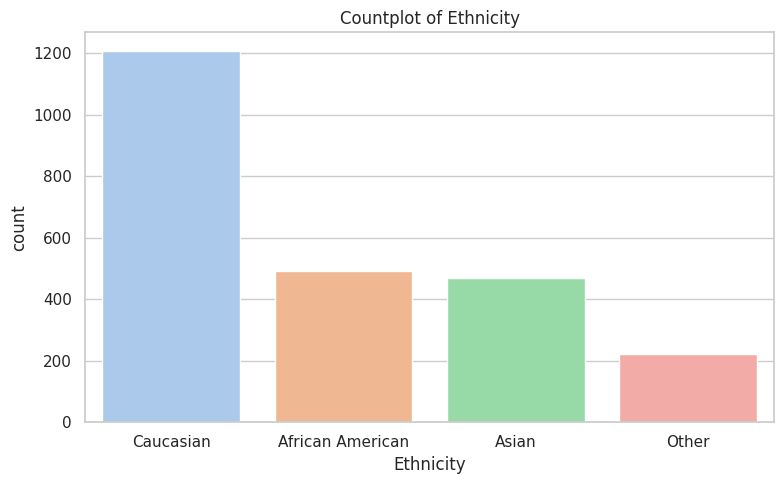

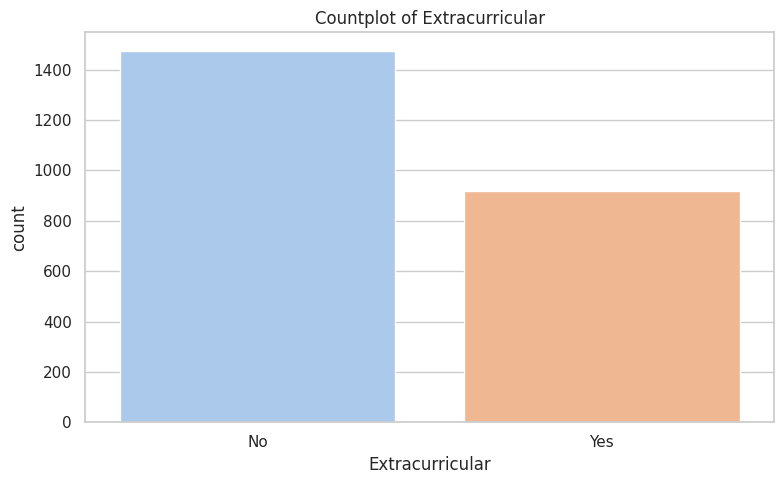

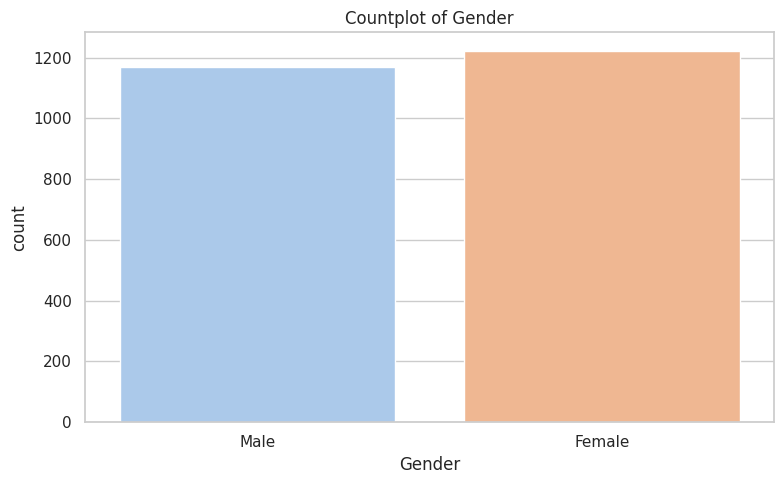

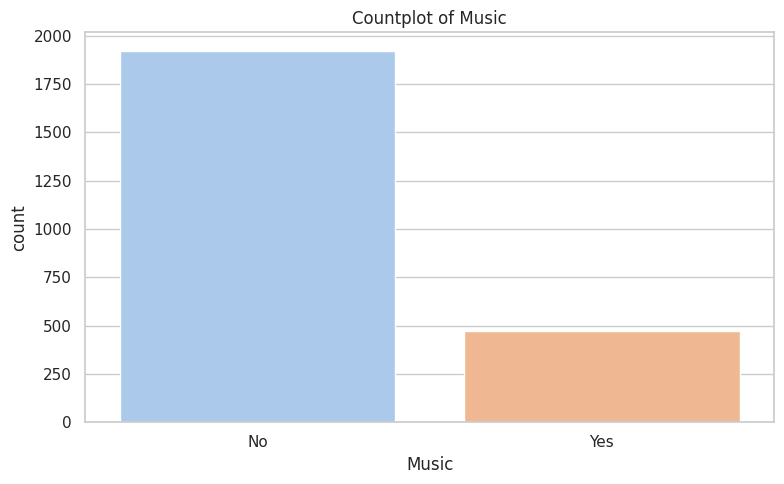

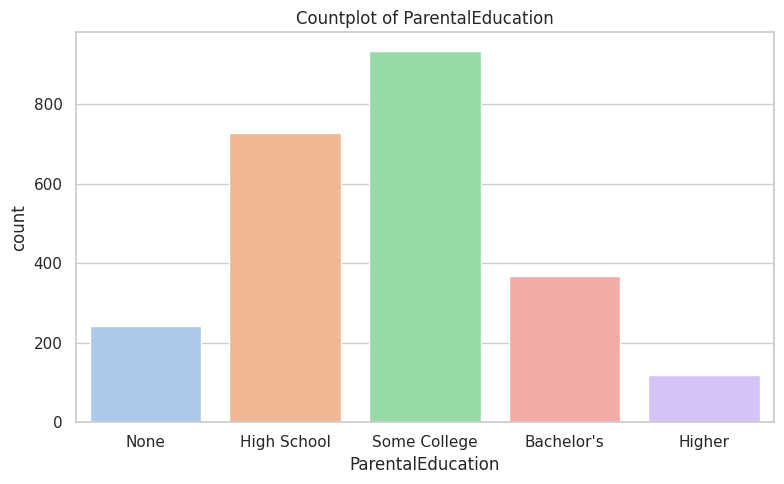

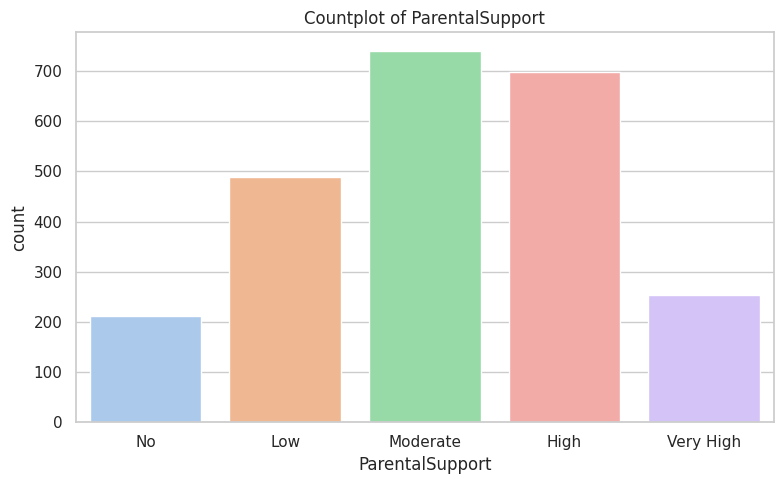

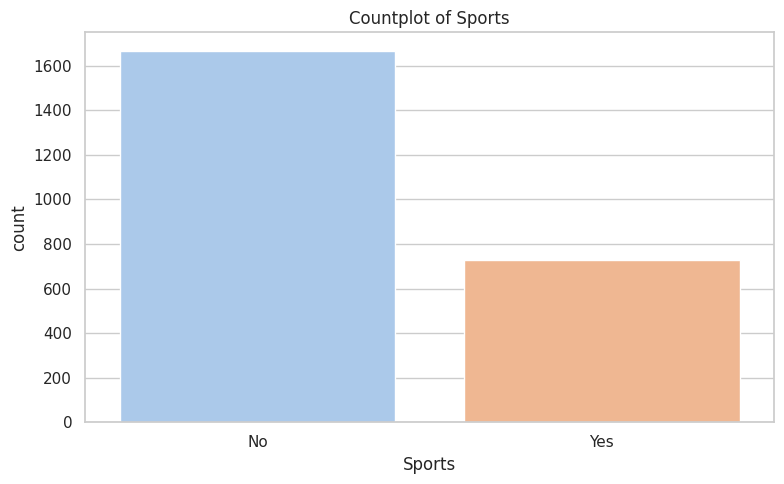

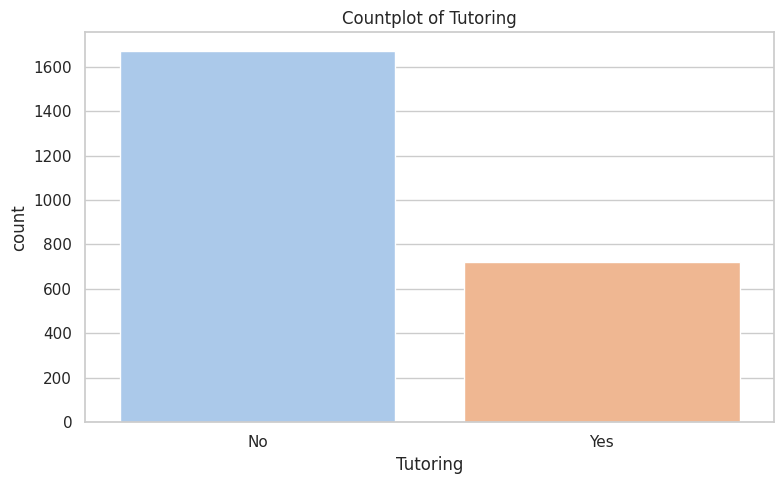

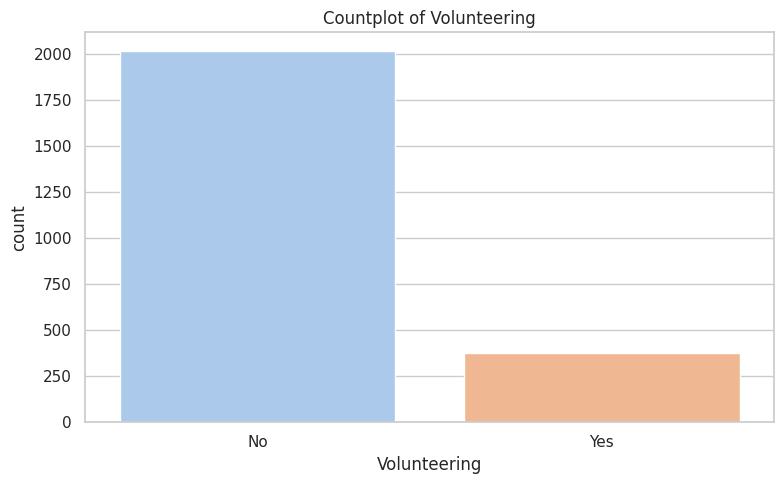

In [7]:
# Custom labels for the categorical columns
custom_labels = {
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'Age': [15, 16, 17, 18],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['No', 'Low', 'Moderate', 'High', 'Very High'],
    'Extracurricular': ['No', 'Yes'],
    'Sports': ['No', 'Yes'],
    'Music': ['No', 'Yes'],
    'Volunteering': ['No', 'Yes'],
    'Gender': ['Male', 'Female']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
    
    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)
    
    plt.tight_layout()
    plt.show()

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>The age <strong>distribution</strong> is balanced, with equal representation of individuals aged 15 to 18.</li>
        <li>The most represented demographic is <strong>Caucasian</strong>. </li>
        <li>Notably, both <strong>females</strong> and <strong>males</strong> are equally represented across the dataset.</li>
        <li>A high number of individuals <strong>do not participate</strong> in music, sports, tutoring, volunteering or any other extracurricular activity.</li>
        <li>Most parents have some <strong>college</strong> education, followed by <strong>high school</strong> graduates and then those with <strong>bachelor's</strong> degrees.</li>
        <li>Parental support follows a <strong>normal distribution</strong>, with most parents providing moderate support.</li>
    </ul>
</div>

<a id='num'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.2. Distribution of Numerical Features  </b></div>

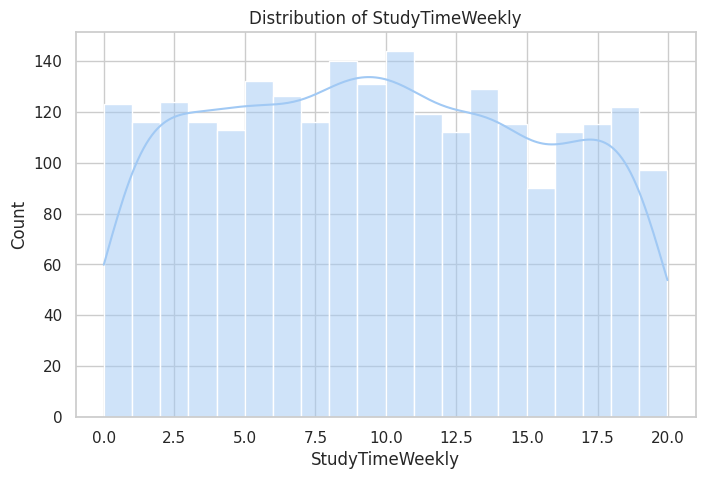

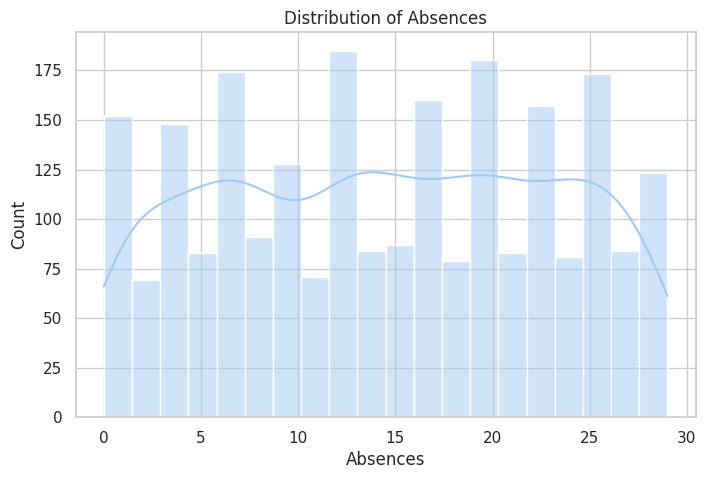

In [8]:
# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>The distribution of absences is <strong>highly variable</strong>. There is no clear pattern but significant fluctuations.</li>
    </ul>
</div>

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.3. Exploring Correlations  </b></div>

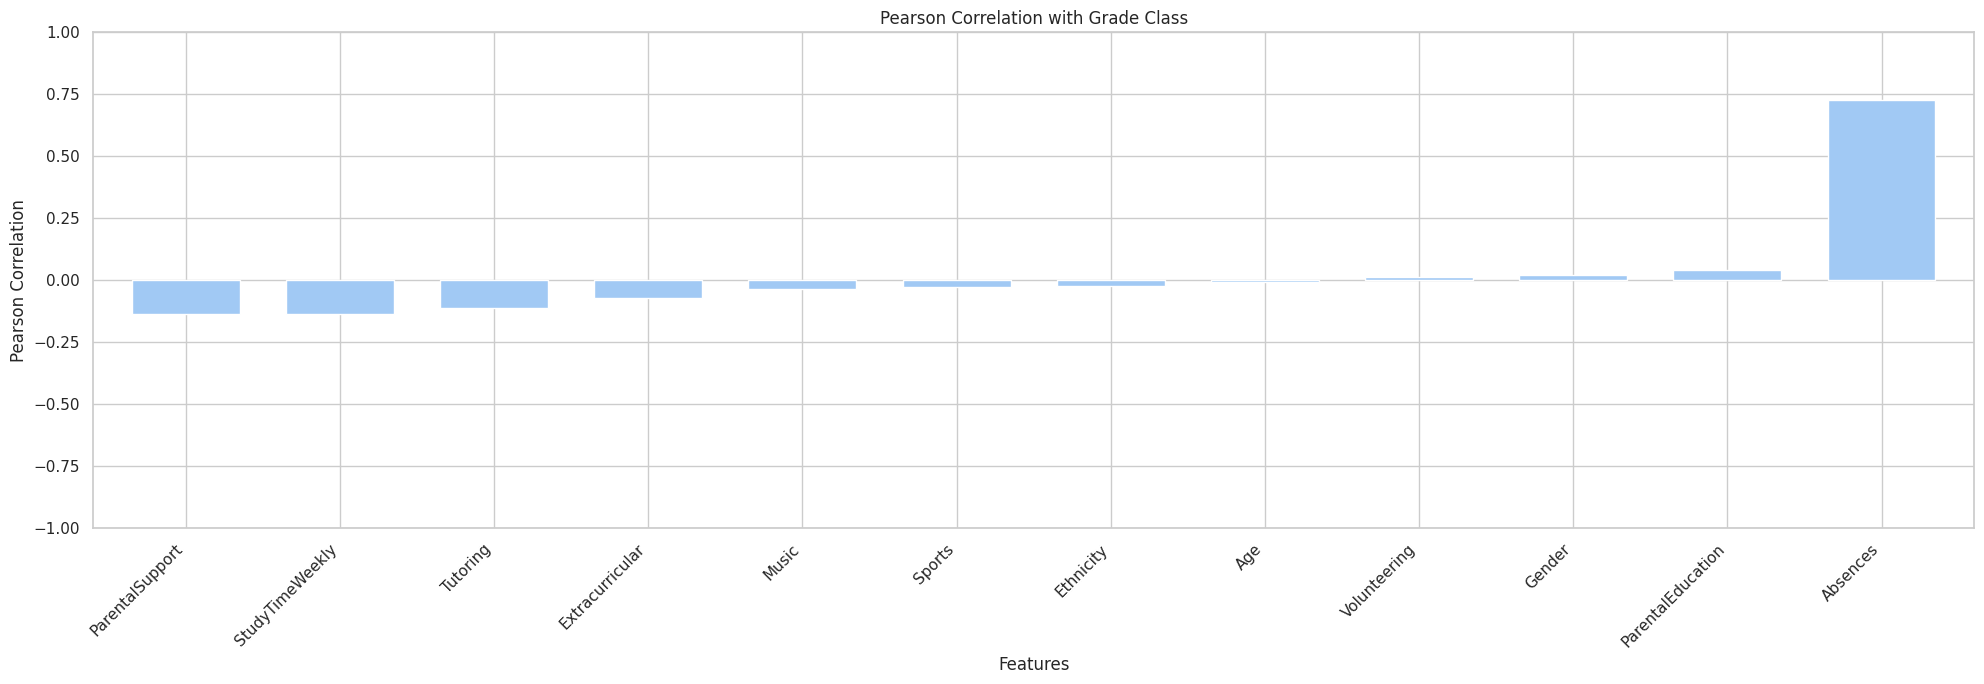

In [9]:
# Compute Pearson correlation coefficients
correlations = df.corr(numeric_only=True)['GradeClass'][:-1].sort_values()

# Set the size of the figure
plt.figure(figsize=(20, 7))

# Create a bar plot of the Pearson correlation coefficients
ax = correlations.plot(kind='bar', width=0.7)

# Set the y-axis limits and labels
ax.set(ylim=[-1, 1], ylabel='Pearson Correlation', xlabel='Features', 
       title='Pearson Correlation with Grade Class')

# Rotate x-axis labels for better readability
ax.set_xticklabels(correlations.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

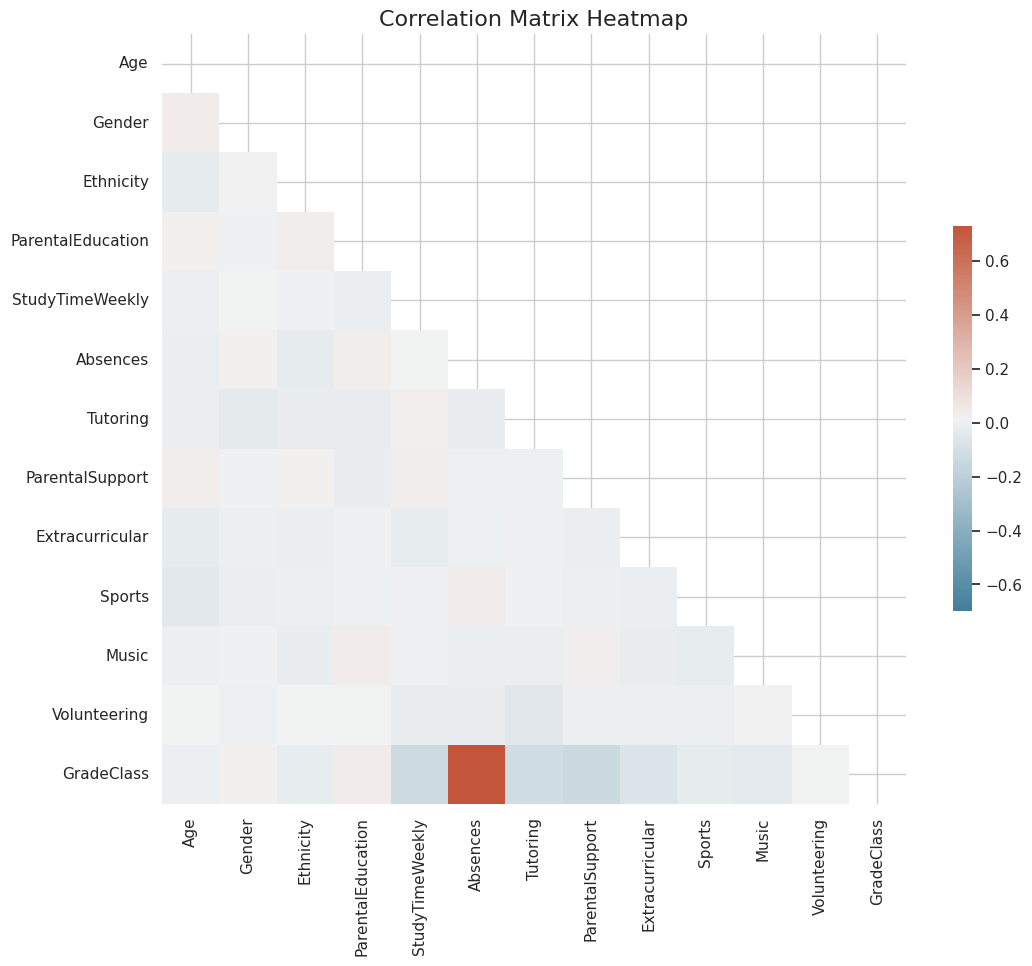

In [10]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Choose a diverging color scheme
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap=cmap, cbar_kws={"shrink": .5}, vmin=-0.7, mask=mask)
plt.title('Correlation Matrix Heatmap', fontsize=16)

plt.show()

In [11]:
# Calculate the correlation with the Grade Class and find the strongest correlation
grade_class_corr = df.corr(numeric_only=True)['GradeClass'].drop('GradeClass')
strongest_correlation = grade_class_corr.idxmax()
strongest_correlation_value = grade_class_corr.max()

print(f"The strongest correlation with the Grade Class is {strongest_correlation} with a value of {strongest_correlation_value:.2f}")


The strongest correlation with the Grade Class is Absences with a value of 0.73


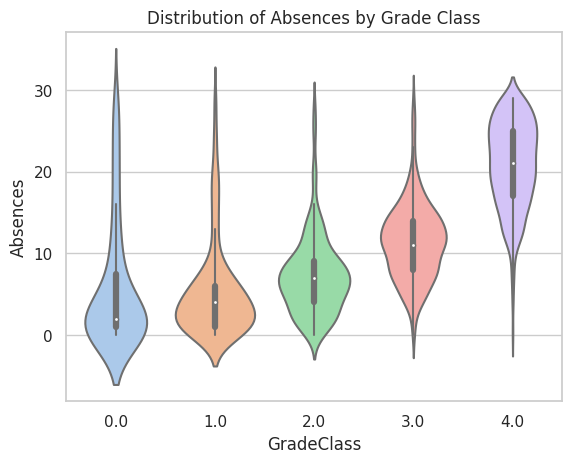

In [12]:
sns.violinplot(data=df, x='GradeClass', y='Absences')        
plt.title(f'Distribution of Absences by Grade Class')
plt.show()

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>The only variable that shows a high correlation with <strong>Grade Class</strong> is <strong>Absences</strong>, with a <strong>positive correlation of 0.73</strong>. This means that more Absences are associated with a higher Grade Class. This makes sense because, in our dataset, the best grade (A) is represented by 0 and the worst grade (F) is represented by 4.</li>
        <li>The <strong>features are not correlated with each other</strong>, which is beneficial as it indicates a lack of multicollinearity, ensuring that each feature provides unique information for analysis.</li>
    </ul>
</div>

<a id='outliers'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.4. Exploring Outliers </b></div>

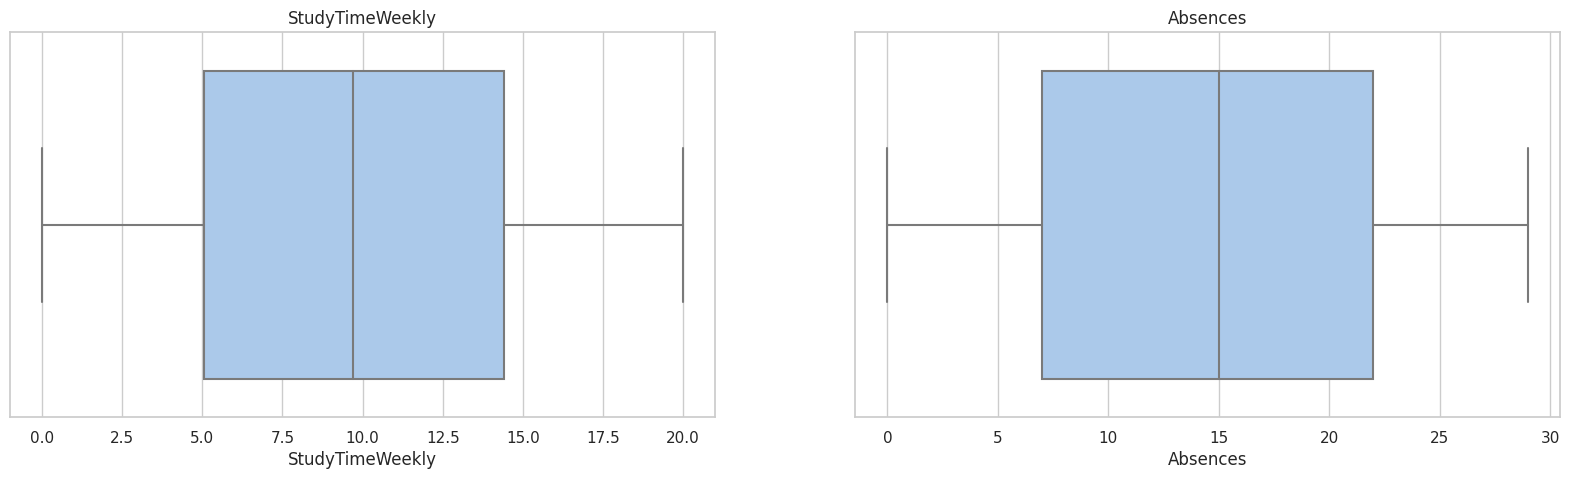

In [13]:
# Create a 1x2 subplot with a figure size of 20x5 inches
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Loop through the first two numerical columns in the DataFrame
for idx in range(2):
    # Create a boxplot for each column
    sns.boxplot(ax=ax[idx], x=df[numerical_columns[idx]])
    ax[idx].set_title(numerical_columns[idx])

In [14]:
# Calculate the Z-scores for the numerical columns in the DataFrame
z_scores = stats.zscore(df[numerical_columns])

# Generate descriptive statistics for the Z-scores and round the results to 3 decimal places
z_scores.describe().round(3)

,StudyTimeWeekly,Absences
count,2392.000,2392.000
mean,0.000,0.000
std,1.000,1.000
min,-1.729,-1.718
25%,-0.837,-0.891
50%,-0.012,0.054
75%,0.820,0.881
max,1.806,1.708


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>There are no <strong>outliers</strong> in the dataset.</li>
    </ul>
</div>

<a id='target'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 3.5. Distribution of a Target Variable  </b></div>

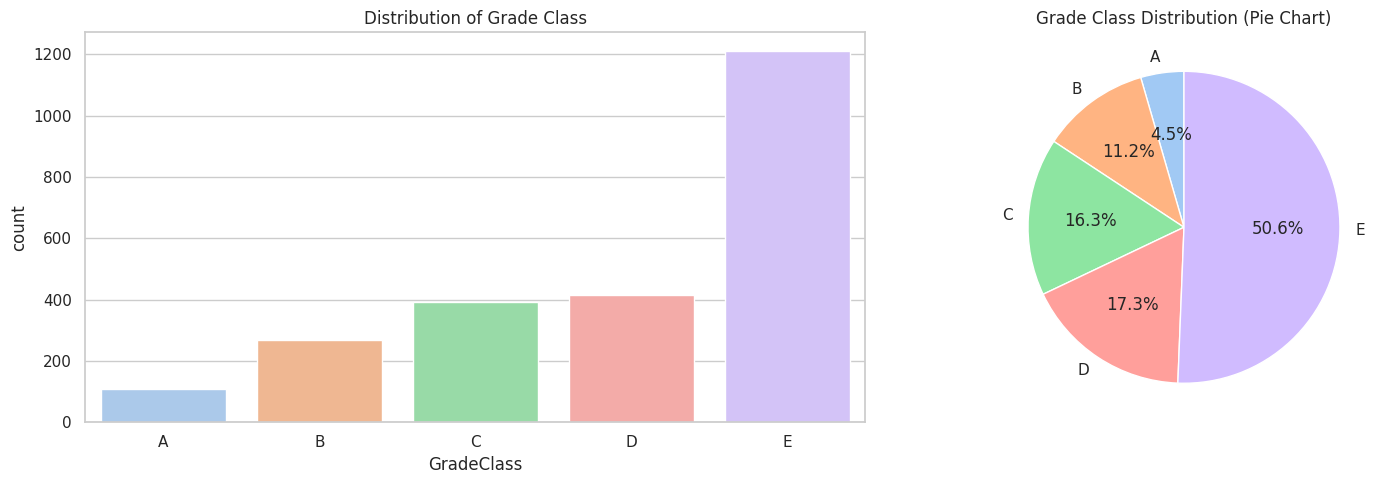

In [15]:
# Set custom labels
labels = ["A", "B", "C", "D", "E"]
ticks = range(len(labels))

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot the count plot on the first subplot
sns.countplot(data=df, x='GradeClass', ax=axes[0])
axes[0].set_title('Distribution of Grade Class')
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(labels)

# Calculate counts for the pie chart
grade_counts = df['GradeClass'].value_counts().sort_index()

# Plot the pie chart on the second subplot
axes[1].pie(grade_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
axes[1].set_title('Grade Class Distribution (Pie Chart)')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        <li>The distribution of Grade Class reveals a <strong>significant imbalance</strong>, with Class E comprising approximately 50% of the dataset.</li>
        <li>Classes A through D exhibit notably lower frequencies, with Class A representing only about 4.5%.</li>
    </ul>
</div>

<a id="prepr"></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b>4. Data Preprocessing</b></div>

<a id='sep'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 4.1. Separate Features and Target  </b></div>

In [16]:
# Separate features (X) and target variable (y)
X = df.loc[:, df.columns != "GradeClass"]
y = df['GradeClass']

<a id='scale'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 4.2. Data Scaling</b></div>

In [17]:
# Standardize the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

<a id='split'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b> 4.3. Train / Test Split </b></div>

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

<a id='ml'></a>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#3168a1; overflow:hidden"><b>5. Modeling</b></div>

In [19]:
# Instantiate classification models with default parameters
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SGD Classifier': SGDClassifier(),
    'Support Vector Machine': SVC(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)  # Set verbose=0 to suppress CatBoost output
}

Decision Tree accuracy: 0.63
Random Forest accuracy: 0.72
Gradient Boosting accuracy: 0.72
AdaBoost accuracy: 0.64
K-Nearest Neighbors accuracy: 0.54
Logistic Regression accuracy: 0.72
SGD Classifier accuracy: 0.63
Support Vector Machine accuracy: 0.70
XGBoost accuracy: 0.71
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 326
[LightGBM] [Info] Number of data points in the train set: 1674, number of used features: 12
[LightGBM] [Info] Start training from score -3.105483
[LightGBM] [Info] Start training from score -2.186529
[LightGBM] [Info] Start training from score -1.809843
[LightGBM] [Info] Start training from score -1.753090
[LightGBM] [Info] Start training from score -0.681271
LightGBM accuracy: 0.71
CatBoost accuracy: 0.72


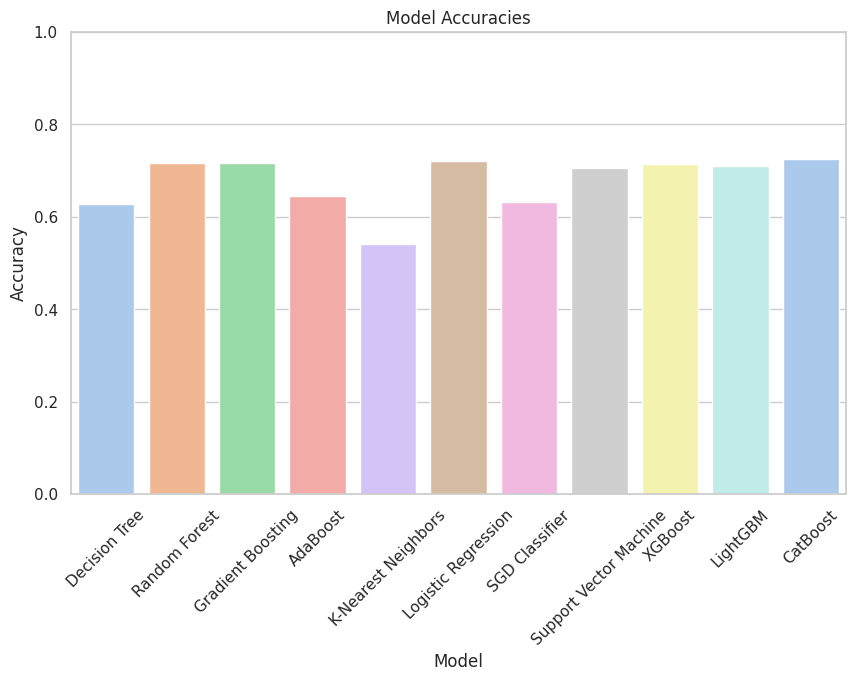

In [20]:
model_names = []
accuracies = []

# Train and evaluate each model
for name, clf in models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f"{name} accuracy: {score:.2f}")

# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_models, palette='pastel')
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'depth': 3, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best cross-validation F1-score: 0.7270
Accuracy = 0.7368, F1-score = 0.5973
Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.25      0.36        32
         1.0       0.58      0.62      0.60        81
         2.0       0.55      0.57      0.56       117
         3.0       0.55      0.56      0.55       124
         4.0       0.90      0.92      0.91       364

    accuracy                           0.74       718
   macro avg       0.65      0.58      0.60       718
weighted avg       0.74      0.74      0.73       718



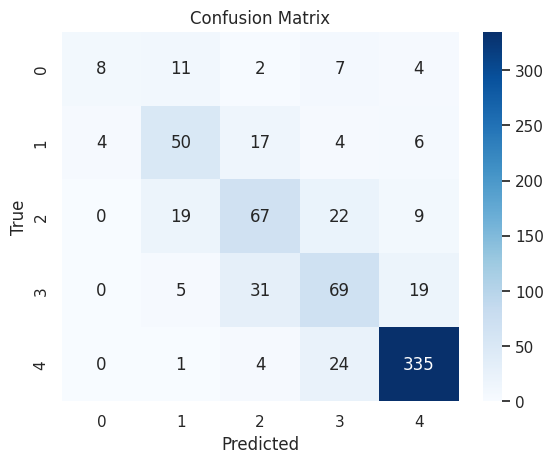

In [21]:
# Define your chosen model
model = CatBoostClassifier(verbose=0)

# Define parameter grid for GridSearchCV
param_grid = {
    'iterations': [100, 200, 500],
    'learning_rate': [0.1, 0.01],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform GridSearchCV with 5-fold cross-validation 
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Train the GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Use the best model found by GridSearchCV for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate and print accuracy and F1-score on test set
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
        The result might seem unimpressive at first glance. However, it's important to remember that we excluded the `GPA` column since our target variable, `Grade_Class`, was derived from it. Our objective was to predict `Grade_Class` using the other available features, and we successfully achieved this with a accuracy score of 0.74.
    </ul>
</div>

<div style="display: flex; justify-content: center;">
    <img src="https://i.giphy.com/gEP2k49ndOqJDBSPZl.webp" alt="GIF">
</div>